In [1]:
import os
import cv2
import random
import pandas as pd
import numpy as np
import datetime as dt
from moviepy.editor import *
import matplotlib.pyplot as plt
import seaborn as sns

###### List the Categories

In [2]:
data_path = '../cali_merl_project/data/'
labels_list = os.listdir(data_path)
labels_list.remove('.DS_Store')
labels_list.remove('.keep')
labels_list.remove('raw_df_w_frames.csv')
labels_list

['Inspect_Shelf',
 'Inspect_Product',
 'Hand_in_Shelf',
 'Reach_to_Shelf',
 'Retract_from_Shelf']

###### Count the number of video per labels

In [3]:
number_of_files = 0
number_of_dirs = 0

for base, dirs, files in os.walk(data_path):
    for directories in dirs:
        number_of_dirs += 1
    for Files in files:
        number_of_files += 1
print('Number of clips', number_of_files)
print('Number of Directories', number_of_dirs)

Number of clips 5379
Number of Directories 5


In [4]:
data = pd.DataFrame(columns=['Labels','Video_Numbers'])

for base, dirs, files in os.walk(data_path):
    for directories in dirs:
        path, dirs, files = next(os.walk(data_path + '/' + directories))
        file_count = len(files)
        data = data.append({'Labels': directories,
                            'Video_Numbers': file_count}, ignore_index = True)

data

Labels Video_Numbers
0       Inspect_Shelf           809
1     Inspect_Product           674
2       Hand_in_Shelf           562
3      Reach_to_Shelf          1710
4  Retract_from_Shelf          1621

<AxesSubplot:xlabel='Labels', ylabel='Video_Numbers'>

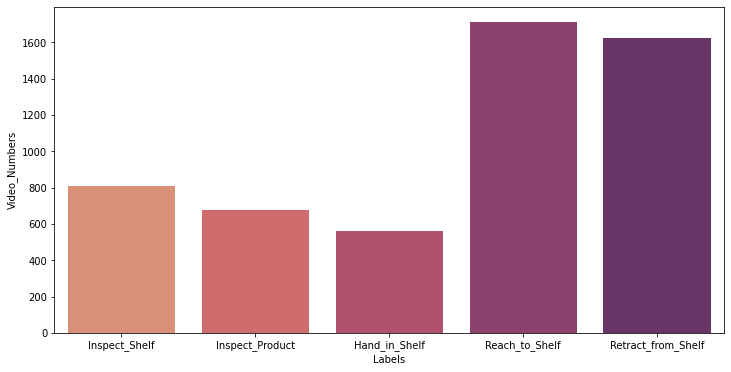

In [5]:
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Labels', y="Video_Numbers", data=data, palette="flare")

**DATASET IMBALANCED ?** <br>
- Data Augmentation ?
    - Oversampling ?
    - Undersampling ? <- Best Solution ? <br>
    
Does it really imbalanced based on the (number_frames * video_numbers) ?

In [23]:
# Count the FPS, the average FPS & number of Frame per category
from statistics import mean

data = pd.DataFrame(columns=['Labels','Video_Numbers', 'totalFrames', 'avgFrames', 'avgFps'])
for base, dirs, files in os.walk(data_path):
    for directories in dirs:
        path, dirs, files = next(os.walk(data_path + directories))
        video_files_names_list = os.listdir(data_path + directories)
        video_files_names_list.remove('.DS_Store')
        
        frames_list = []
        fps_list = []
        for i in video_files_names_list:
            cap = cv2.VideoCapture(path + '/' + i)
            total_number_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            total_fps = int(cap.get(cv2.CAP_PROP_FPS))
            frames_list.append(total_number_frames)
            fps_list.append(total_fps)
        
        file_count = len(files)
        data = data.append({'Labels': directories,
                            'Video_Numbers': file_count,
                            'totalFrames': sum(frames_list),
                            'avgFrames': round(mean(frames_list),2),
                            'avgFps': mean(fps_list)}, ignore_index = True)

data

Labels Video_Numbers totalFrames  avgFrames avgFps
0       Inspect_Shelf           803      101765     126.89     30
1     Inspect_Product           673       77402     115.18     30
2       Hand_in_Shelf           562       35349      63.01     30
3      Reach_to_Shelf          1701       57603      33.88     30
4  Retract_from_Shelf          1612       58823      36.51     30

<AxesSubplot:xlabel='Labels', ylabel='totalFrames'>

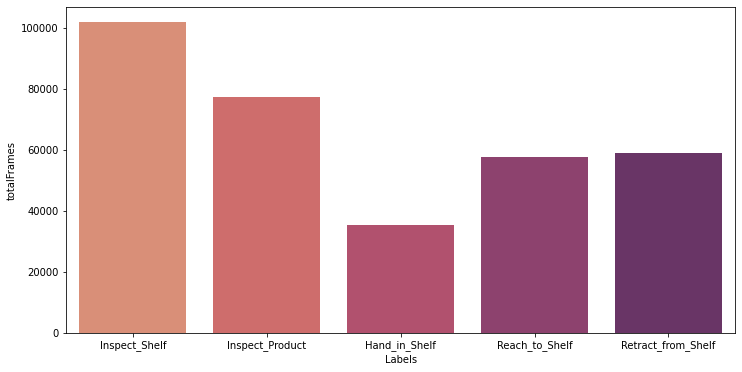

In [24]:
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Labels', y="totalFrames", data=data, palette="flare")

In [7]:
# Inspect that error
clip = VideoFileClip('../cali_merl_project/data/Reach_to_Shelf/12_3_ReachToShelf_1_398_398.mp4')
clip.ipython_display(width = 360)

OSError: MoviePy error: the file ../cali_merl_project/data/Reach_to_Shelf/12_3_ReachToShelf_1_398_398.mp4 could not be found!
Please check that you entered the correct path.

That clip has 0 frames, we can delete it !

In [ ]:
os.remove('../cali_merl_project/data/Reach_to_Shelf/12_3_ReachToShelf_1_398_398.mp4')

###### Visualize random clip for each labels

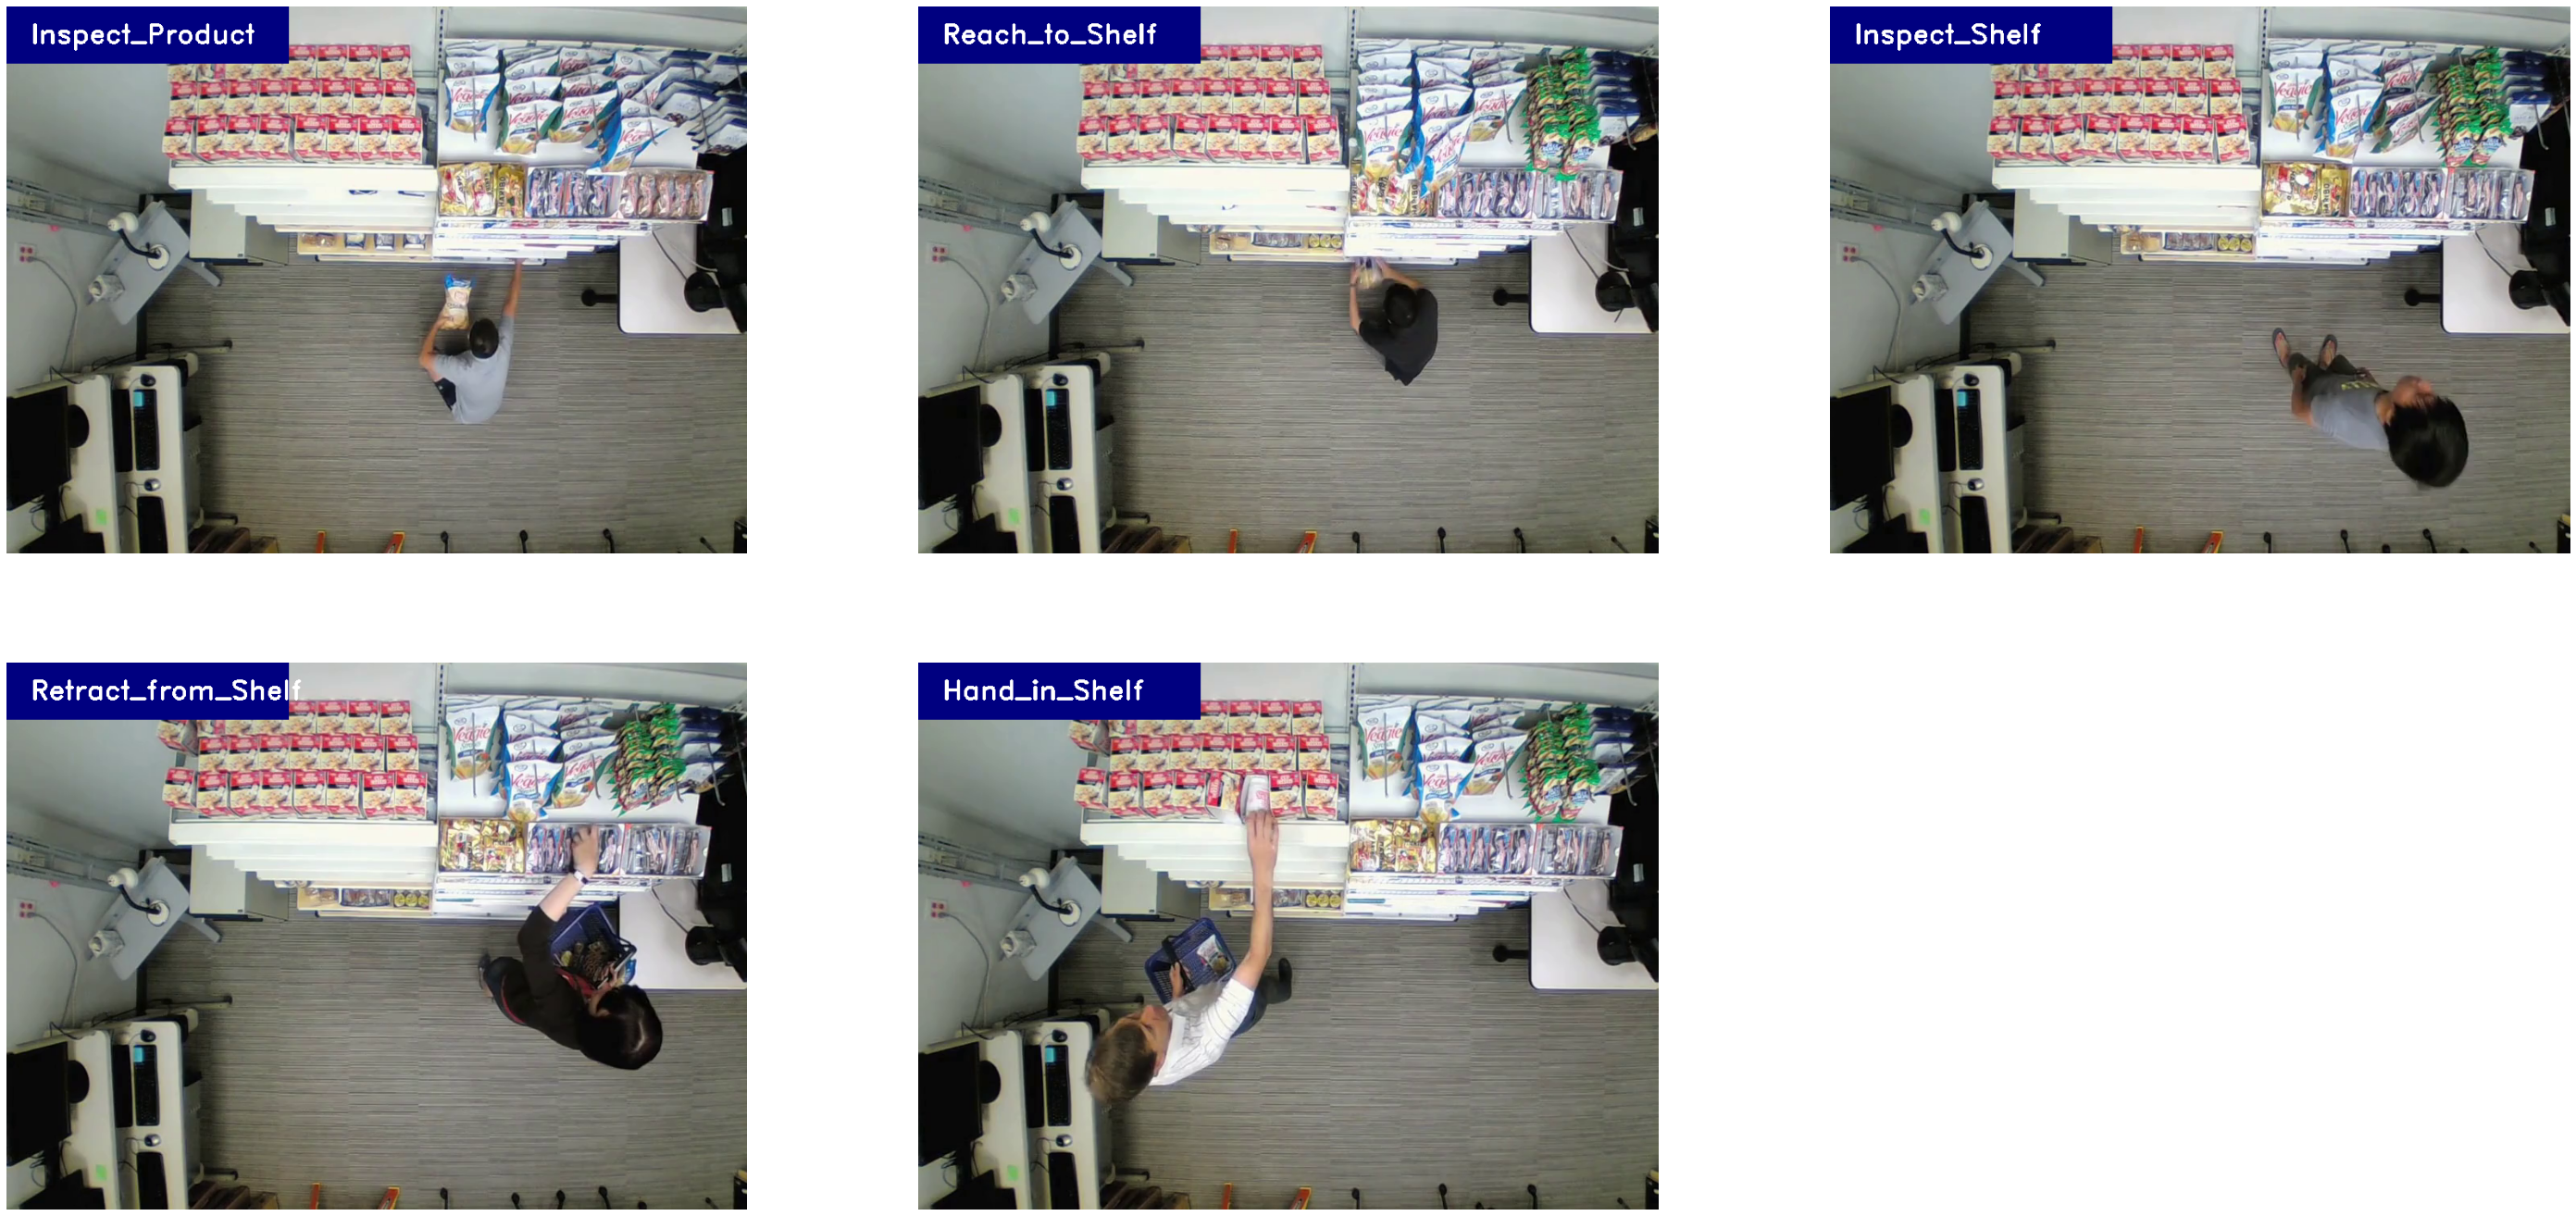

In [8]:
plt.figure(figsize = (50, 50))
random_range = random.sample(range(len(labels_list)), 5)

for counter, random_index in enumerate(random_range, 1):

    # Getting Class Name using Random Index
    selected_label = labels_list[random_index]
    clip_list = os.listdir(data_path + selected_label)
    selected_clip = random.choice(clip_list)

    # Reading first frame of each clips
    video_reader = cv2.VideoCapture(data_path + selected_label + '/' + selected_clip)
    _, bgr_frame = video_reader.read()
    video_reader.release()
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Add Label on top of the clips
    x,y,w,h = 0,0,350,70
    cv2.rectangle(rgb_frame, (x, x), (x + w, y + h), (0,0,128), -1)
    cv2.putText(rgb_frame, selected_label, (30, 45), cv2.FONT_HERSHEY_DUPLEX, 1.1, (255, 255, 255), 2)
    
    # Plot everything
    plt.subplot(4, 3, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [12]:
# Play a random clip
random_range = random.sample(range(len(labels_list)), 5)
selected_label = labels_list[random_index]
clip_list = os.listdir(data_path + selected_label)
selected_clip = random.choice(clip_list)

clip = VideoFileClip(data_path + selected_label + '/' + selected_clip)

# Add Labels on the clip 
txt_clip = TextClip(selected_label, fontsize = 25, font = 'Helvetica-Bold', color = 'white', bg_color="#000080")
txt_clip = txt_clip.set_pos(("left", "top")).set_duration(clip.duration)
    
# Overlay the text clip on the first video clip 
video = CompositeVideoClip([clip, txt_clip])
video.ipython_display(width = 580)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
